# Esame

### Pre-processing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

Inizialmente viene creato un oggetto di tipo DataFrame, della libreria Pandas:

In [ ]:
cov19 = pd.read_csv('dataset_exam.csv')

La prima cosa da fare è osservare il dataframe per capire se ci sono delle features da scartare. Ci possono essere due motivi per cui una colonna viene eliminata:
- la feature in questione non è rilevante ai fini dell'analisi dati
- la feature non è utilizzabile a causa della mancanza di alcuni dati

Si sceglie di procedere andando prima ad eliminare le colonne non rilevanti. 
In questo modo si evita di dover analizzare eventuali valori mancanti in colonne che comunque non verrebbero usate. 

Si notano subito due colonne che possono essere eliminate: la prima colonna contenente gli indici (ridondante, poiché l'oggetto di tipo dataframe indicizza automaticamente le righe del dataset) e l'ultima, contenente il nome della regione; questa non è necessaria poiché l'analisi viene effettuata sui soli comuni umbri. 

In [ ]:
cov19 = cov19.drop(columns='Region', axis=1)
cov19 = cov19.drop(columns='Unnamed: 0', axis=1)

In seguito si cercano eventuali colonne uguali e una delle due colonne viene rimossa. Viene usato il metodo "duplicated", che però lavora sulle righe. Pertanto, il dataset viene trasposto, analizzato, vengono eliminate le righe ripetute e viene trasposto di nuovo. Vengono anche stampate su schermo le features che sono state eliminate. Si può dedurre che fossero dei doppioni dalla presenza del ".1" alla fine del nome.

In [ ]:
transposed_cov19 = cov19.transpose()

duplicate_columns = transposed_cov19.duplicated(keep='first')
duplex = duplicate_columns[duplicate_columns==True].index.tolist()

unique_columns = transposed_cov19[~duplicate_columns].index

cov19 = cov19[unique_columns].copy()

print("colonne ripetute escluse: \n", duplex)

colonne ripetute escluse: 
 ['mean_pm10_ug/m3_mean_jan_jun_2020.1', 'mean_pm10_ug/m3_std_jan_jun_2020.1', 'mean_pm10_ug/m3_median_jan_jun_2020.1']


City        lat        lng  Population  Density  Surface  \
0  Acquasparta  42.691173  12.546451        4611     57.0    81.61   
1     Allerona  42.812033  11.973053        1722     21.0    82.61   
2      Alviano  42.588208  12.295936        1428     60.0    23.90   
3       Amelia  42.553528  12.416776       11852     89.0   132.50   
4       Arrone  42.583433  12.769865        2703     66.0    41.04   

   Depriv_idx  CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0    1.013507                        6                             1   
1   -1.309272                        3                             1   
2   -2.148882                        2                             1   
3   -0.832084                        5                             1   
4   -0.479919                        7                             1   

   AvgHospitalized_jan_jun_2020  ...  mean_pm10_ug/m3_mean_2019  \
0                      0.273585  ...                  16.258196   
1                      0.336735  ...                  15.874484   
2                      0.252632  ...                  20.957803   
3                      0.317308  ...                  17.890738   
4                      0.475728  ...                  14.221094   

   mean_pm10_ug/m3_std_2019  mean_pm10_ug/m3_median_2019  \
0                  7.288500                    14.674647   
1                  7.038712                    14.752206   
2                  8.908002                    19.626043   
3                  7.749981                    16.706606   
4                  7.416702                    12.388708   

   max_pm10_ug/m3_median_2019  max_pm10_ug/m3_mean_2019  \
0                   27.591324                 31.958118   
1                   26.312595                 30.565736   
2                   30.008255                 34.685780   
3                   31.103338                 36.154165   
4                   26.191957                 32.194737   

   max_pm10_ug/m3_std_2019  min_pm10_ug/m3_median_2019  \
0                15.960667                    6.754477   
1                18.320679                    4.790663   
2                17.674601                    8.948166   
3                19.364122                    7.095291   
4                20.364874                    3.970692   

   min_pm10_ug/m3_mean_2019  min_pm10_ug/m3_std_2019                 Zone  
0                  7.535171                 4.595696  collinare e montana  
1                  5.623008                 3.754214  collinare e montana  
2                  9.722944                 5.046609  collinare e montana  
3                  7.938031                 4.636137  collinare e montana  
4                  4.888365                 4.001205  collinare e montana  

[5 rows x 32 columns]

Viene ora analizzato il dataset per verificare la presenza di tutti i dati. Si scorrono le colonne e per ogni colonna viene registrato il numero di valori nulli presente.

In [6]:
null_val = cov19.isnull().sum()
null_values = null_val[null_val==True]
print("Variabili per cui mancano dei dati: \n", null_values)

Variabili per cui mancano dei dati: 
 min_pm10_ug/m3_std_2019    1
dtype: int64


A questo punto si possono seguire due strade:
- si sceglie di tenere comunque i dati, segnalando il dato mancante ad esempio con NaN;
- si elimina la variabile con dati mancanti dal dataset (colonna), oppure si eliminano le righe contenenti i dati mancanti.

In questo caso c'è una sola feature per cui manca un unico dato. Si sceglie di eliminare il dato mancante. Considerando il tipo di variabile, si ritiene che l'eliminazione della riga comporterebbe una perdita di dati più rilevanti rispetto all'eliminazione della feature. Pertanto viene eliminata tutta la colonna di dati.


In [7]:
#vengono eliminate tutte le colonne contenenti un valore nullo

null_columns = null_val[null_val==True].index.tolist()
for col in null_columns:
    cov19 = cov19.drop(columns=f"{col}", axis=1)
cov19.head()


City        lat        lng  Population  Density  Surface  \
0  Acquasparta  42.691173  12.546451        4611     57.0    81.61   
1     Allerona  42.812033  11.973053        1722     21.0    82.61   
2      Alviano  42.588208  12.295936        1428     60.0    23.90   
3       Amelia  42.553528  12.416776       11852     89.0   132.50   
4       Arrone  42.583433  12.769865        2703     66.0    41.04   

   Depriv_idx  CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0    1.013507                        6                             1   
1   -1.309272                        3                             1   
2   -2.148882                        2                             1   
3   -0.832084                        5                             1   
4   -0.479919                        7                             1   

   AvgHospitalized_jan_jun_2020  ...  min_pm10_ug/m3_median_jan_jun_2020  \
0                      0.273585  ...                            5.875184   
1                      0.336735  ...                            4.329871   
2                      0.252632  ...                            8.142606   
3                      0.317308  ...                            6.741657   
4                      0.475728  ...                            3.460392   

   mean_pm10_ug/m3_mean_2019  mean_pm10_ug/m3_std_2019  \
0                  16.258196                  7.288500   
1                  15.874484                  7.038712   
2                  20.957803                  8.908002   
3                  17.890738                  7.749981   
4                  14.221094                  7.416702   

   mean_pm10_ug/m3_median_2019  max_pm10_ug/m3_median_2019  \
0                    14.674647                   27.591324   
1                    14.752206                   26.312595   
2                    19.626043                   30.008255   
3                    16.706606                   31.103338   
4                    12.388708                   26.191957   

   max_pm10_ug/m3_mean_2019  max_pm10_ug/m3_std_2019  \
0                 31.958118                15.960667   
1                 30.565736                18.320679   
2                 34.685780                17.674601   
3                 36.154165                19.364122   
4                 32.194737                20.364874   

   min_pm10_ug/m3_median_2019  min_pm10_ug/m3_mean_2019                 Zone  
0                    6.754477                  7.535171  collinare e montana  
1                    4.790663                  5.623008  collinare e montana  
2                    8.948166                  9.722944  collinare e montana  
3                    7.095291                  7.938031  collinare e montana  
4                    3.970692                  4.888365  collinare e montana  

[5 rows x 31 columns]

Inoltre, tutti i dati relativi all'epidemiologia vengono normalizzati "ogni 1000 abitanti".

Vengono normalizzate le seguenti features:
- casi covid totali
- ospedalizzazioni (max e avg)
- ricoveri in terapia intensiva (max e avg)
- decessi

Inizialmente viene stampato un elenco delle colonne per identificare gli indici di quelle di interesse:

In [8]:
all_features = cov19.columns.tolist()
for i in np.arange(np.size(all_features)):
    print(all_features[i]," ", i)

City   0
lat   1
lng   2
Population   3
Density   4
Surface   5
Depriv_idx   6
CovidCases_jan_jun_2020   7
MaxHospitalized_jan_jun_2020   8
AvgHospitalized_jan_jun_2020   9
Deceased_jan_jun_2020   10
MaxIntensiveCare_jan_jun_2020   11
AvgIntensiveCare_jan_jun_2020   12
mean_pm10_ug/m3_mean_jan_jun_2020   13
mean_pm10_ug/m3_std_jan_jun_2020   14
mean_pm10_ug/m3_median_jan_jun_2020   15
max_pm10_ug/m3_mean_jan_jun_2020   16
max_pm10_ug/m3_std_jan_jun_2020   17
max_pm10_ug/m3_median_jan_jun_2020   18
min_pm10_ug/m3_mean_jan_jun_2020   19
min_pm10_ug/m3_std_jan_jun_2020   20
min_pm10_ug/m3_median_jan_jun_2020   21
mean_pm10_ug/m3_mean_2019   22
mean_pm10_ug/m3_std_2019   23
mean_pm10_ug/m3_median_2019   24
max_pm10_ug/m3_median_2019   25
max_pm10_ug/m3_mean_2019   26
max_pm10_ug/m3_std_2019   27
min_pm10_ug/m3_median_2019   28
min_pm10_ug/m3_mean_2019   29
Zone   30


Le features epidemiologiche sono comprese tra la settima e la dodicesima feature (incluse).

In [ ]:
#copia del df in caso servisse quello non normalizzato; quello di default sarà quello normalizzato
cov19_not_norm = cov19

features_epidemiology = all_features[7:13]

for c in features_epidemiology:
    cov19[f"{c}"] = cov19[f"{c}"]*1000/cov19['Population']
    new_name = f"{c}/1000_inhabitants"
    cov19.rename(columns={c: new_name}, inplace=True)
    

City       lat       lng  Population  Density  Surface  Depriv_idx  \
0  Acquasparta  42.69117  12.54645        4611     57.0    81.61     1.01351   
1     Allerona  42.81203  11.97305        1722     21.0    82.61    -1.30927   
2      Alviano  42.58821  12.29594        1428     60.0    23.90    -2.14888   
3       Amelia  42.55353  12.41678       11852     89.0   132.50    -0.83208   
4       Arrone  42.58343  12.76986        2703     66.0    41.04    -0.47992   

   CovidCases_jan_jun_2020/1000_inhabitants  \
0                                   1.30124   
1                                   1.74216   
2                                   1.40056   
3                                   0.42187   
4                                   2.58972   

   MaxHospitalized_jan_jun_2020/1000_inhabitants  \
0                                        0.21687   
1                                        0.58072   
2                                        0.70028   
3                                        0.08437   
4                                        0.36996   

   AvgHospitalized_jan_jun_2020/1000_inhabitants  ...  \
0                                        0.05933  ...   
1                                        0.19555  ...   
2                                        0.17691  ...   
3                                        0.02677  ...   
4                                        0.17600  ...   

   min_pm10_ug/m3_median_jan_jun_2020  mean_pm10_ug/m3_mean_2019  \
0                             5.87518                   16.25820   
1                             4.32987                   15.87448   
2                             8.14261                   20.95780   
3                             6.74166                   17.89074   
4                             3.46039                   14.22109   

   mean_pm10_ug/m3_std_2019  mean_pm10_ug/m3_median_2019  \
0                   7.28850                     14.67465   
1                   7.03871                     14.75221   
2                   8.90800                     19.62604   
3                   7.74998                     16.70661   
4                   7.41670                     12.38871   

   max_pm10_ug/m3_median_2019  max_pm10_ug/m3_mean_2019  \
0                    27.59132                  31.95812   
1                    26.31260                  30.56574   
2                    30.00826                  34.68578   
3                    31.10334                  36.15417   
4                    26.19196                  32.19474   

   max_pm10_ug/m3_std_2019  min_pm10_ug/m3_median_2019  \
0                 15.96067                     6.75448   
1                 18.32068                     4.79066   
2                 17.67460                     8.94817   
3                 19.36412                     7.09529   
4                 20.36487                     3.97069   

   min_pm10_ug/m3_mean_2019                 Zone  
0                   7.53517  collinare e montana  
1                   5.62301  collinare e montana  
2                   9.72294  collinare e montana  
3                   7.93803  collinare e montana  
4                   4.88837  collinare e montana  

[5 rows x 31 columns]

#### Correzione coordinate del comune di Giove

Si nota che le coordinate del comune di Giove non sono corrette, pertanto vengono sostituite:

In [ ]:
indice_giove = cov19.index[cov19['City'] == 'Giove'].tolist()
cov19.loc[indice_giove[0], "lat"] = 42.5103083
cov19.loc[indice_giove[0], "lng"] = 12.3315972

Per finire, tutti i valori numerici vengono arrotondati a 5 cifre decimali. 

In [ ]:
all_features = cov19.columns.tolist()
cov19 = cov19[all_features].round(5)
cov19.head()

Questo conclude la fase di pre-processing del dataset.

### 3. Plots 

Vengono creati dei grafici che mettano in relazione variabili demografiche, geografiche ed epidemiologiche. Per la struttura del dataset, si ritiene che il tipo di grafico che fornisca le informazioni in maniera più chiara sia lo scatter plot. 
Vengono creati due grafici che mettono in relazione diverse variabili tra loro. In ogni grafico sono inserite delle tooltip che contengono il nome del comune, la popolazione e altre informazioni specifiche del grafico.

#### Primo plot

Il grafico creato di seguito mette in relazione il numero di casi covid registrati in un comune con il deprivation index. Il colore dei marker è relativo alla feature "zone".

In [ ]:
import plotly.graph_objects as go

size = 10
# dizionario che definisce il colore del marker
colors = {'collinare e montana':'darkgreen', 'di valle':'limegreen', 'conca ternana':'purple'}
marker_color = [colors[cat] for cat in cov19['Zone']]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = cov19['Depriv_idx'], y = cov19['CovidCases_jan_jun_2020/1000_inhabitants'], 
    mode = 'markers',
    marker=dict(
        size=size,
        symbol='circle',
        color=marker_color  # Colonna per il colore
    ),
    name = 'collinare e montana',
    showlegend=True
    ))

# vengono aggiunte due "fake-trace" per la legenda

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(
        size=10,
        symbol='circle',
        color=colors['di valle']
    ),
    name='di valle'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(
        size=10,
        symbol='circle',
        color=colors['conca ternana']
    ),
    name='conca ternana'
))

# tooltips
fig.update_traces(
    hoverinfo='text',
    text = cov19['City'] +
    '<br>Popolazione: ' + cov19['Population'].astype(str)
    +'<br>Casi Covid: ' + cov19['CovidCases_jan_jun_2020/1000_inhabitants'].round(5).astype(str)
    +'<br>Deprivation index: ' + cov19['Depriv_idx'].round(5).astype(str), 
)

fig.update_layout(
    width=800,
    height=600,
    title={
        'text': 'Casi covid in funzione dell\'indice di deprivazione',
        'x': 0.5,
        'font':{'size':24},
        'xanchor': 'center',
        'yanchor': 'top'
        },
    xaxis_title='Indice di deprivazione',
    yaxis_title='Casi covid\\1000 ab.',
    legend=dict(x=0.67, y=0.98, title = 'Zona'),
    showlegend=True
)

fig.show()

#### Secondo plot

Uno dei vantaggi di usare uno scatter plot è la possibilità di inserire molte informazioni, grazie alle diverse dimensionalità. Infatti, oltre agli assi principali che già forniscono la possibilità di confrontare due features tra loro, si possono modificare:
- il colore e la dimensione del marker, che possono essere legate a variabili quantitative o qualitative;
- la forma del marker, che può contenere informazioni relative a una variabile qualitativa.

Il grafico costruito di seguito sfrutta queste proprietà e mostra le stesse informazioni del primo, ma con l'aggiunta delle ospedalizzazioni tra gennaio e giugno 2020.
La dimensione del marker indica il numero medio di ricoveri, mentre il colore il numero medio di ricoveri in terapia intensiva. I marker di forma triangolare indicano che ci sono stati dei decessi causati dal covid nel comune.

In [82]:
import plotly.graph_objects as go

# parametri per la dimensione dei marker
scale = 30
start = 0.3

size = (cov19['AvgHospitalized_jan_jun_2020/1000_inhabitants']+start)*scale

# array che definisce la forma del marker: triangolo se ci sono stati decessi nel comune, cerchio altrimenti
symbols = np.where(cov19['Deceased_jan_jun_2020/1000_inhabitants'] == 0, 'circle', 'triangle-up')

fig = go.Figure()

fig.add_trace(go.Scatter(   # aggiungo i dati per cui non ci sono stati decessi
    x = cov19['Depriv_idx'], y = cov19['CovidCases_jan_jun_2020/1000_inhabitants'], 
    mode = 'markers',
    marker=dict(
        size=size,  # Colonna delle dimensioni dei marker
        symbol=symbols,
        color=cov19['AvgIntensiveCare_jan_jun_2020/1000_inhabitants'],  # Colonna per il colore
        colorbar=dict(title="Ricoveri in terapia intensiva"),
        colorscale='Plasma',
        showscale=True
    ),
    showlegend=False
    ))

# vengono aggiunte due "fake-trace" per la legenda

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(
        size=10,
        symbol='circle',
        color='darkslateblue'
    ),
    name='Zero decessi'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(
        size=10,
        symbol='triangle-up',
        color='darkslateblue'
    ),
    name='Uno o più decessi'
))

# tooltips
fig.update_traces(
    hoverinfo='text',
    text = cov19['City'] +
    '<br>Popolazione: ' + cov19['Population'].astype(str)
    +'<br>Media ricoveri: ' + cov19['AvgHospitalized_jan_jun_2020/1000_inhabitants'].round(5).astype(str)
    +'<br>Media ricoveri TI: ' + cov19['AvgIntensiveCare_jan_jun_2020/1000_inhabitants'].round(5).astype(str), 
)

# Layout del grafico
fig.update_layout(
    width=800,
    height=600,
    title={
        'text': 'Media dei ricoveri ogni 1000 abitanti',
        'x': 0.5,
        'font':{'size':24},
        'xanchor': 'center',
        'yanchor': 'top'
        },
    xaxis_title='Deprivation index',
    yaxis_title='Casi covid/1000 abitanti',
    legend=dict(x=0.67, y=0.98, title = 'Decessi'),
    showlegend=True
)

fig.show()

### 3.1 Plot con feature selezionabile

Viene creato uno scatter plot in cui la terza feature da mettere in relazione è selezionabile tra alcune features del dataframe.  

In [12]:
import plotly.express as px
from ipywidgets import widgets
from ipywidgets import interact

size = 10
all_features = cov19.columns.tolist()
options = all_features[6:20]    # seleziona le features che possono essere visualizzate nel grafico

def func(third_feature):
    fig = px.scatter(cov19,
        x = 'Population', y = 'Density',
        color=third_feature,
        color_continuous_scale='Viridis',
        hover_name='City',
        hover_data=['Population', third_feature],
        )

    fig.update_layout(
        width=1000,
        height=600,
        title={
            'text': 'Dati in funzione della demografia',
            'x': 0.5,
            'font':{'size':24},
            'xanchor': 'center',
            'yanchor': 'top'
            },
        xaxis_title='Popolazione',
        yaxis_title='Densità abitativa',
        yaxis_type = 'log',
        xaxis_type = 'log',
        yaxis_dtick = 1.,
        xaxis_dtick = 1.,
    )

    fig.show()

interact(func, third_feature = widgets.Dropdown(options=options, description='Variabile:'))

interactive(children=(Dropdown(description='Variabile:', options=('Depriv_idx', 'CovidCases_jan_jun_2020/1000_…

<function __main__.func(third_feature)>

### 4. Matrice di correlazione

Text(0.5, 1.0, 'Matrice di correlazione')

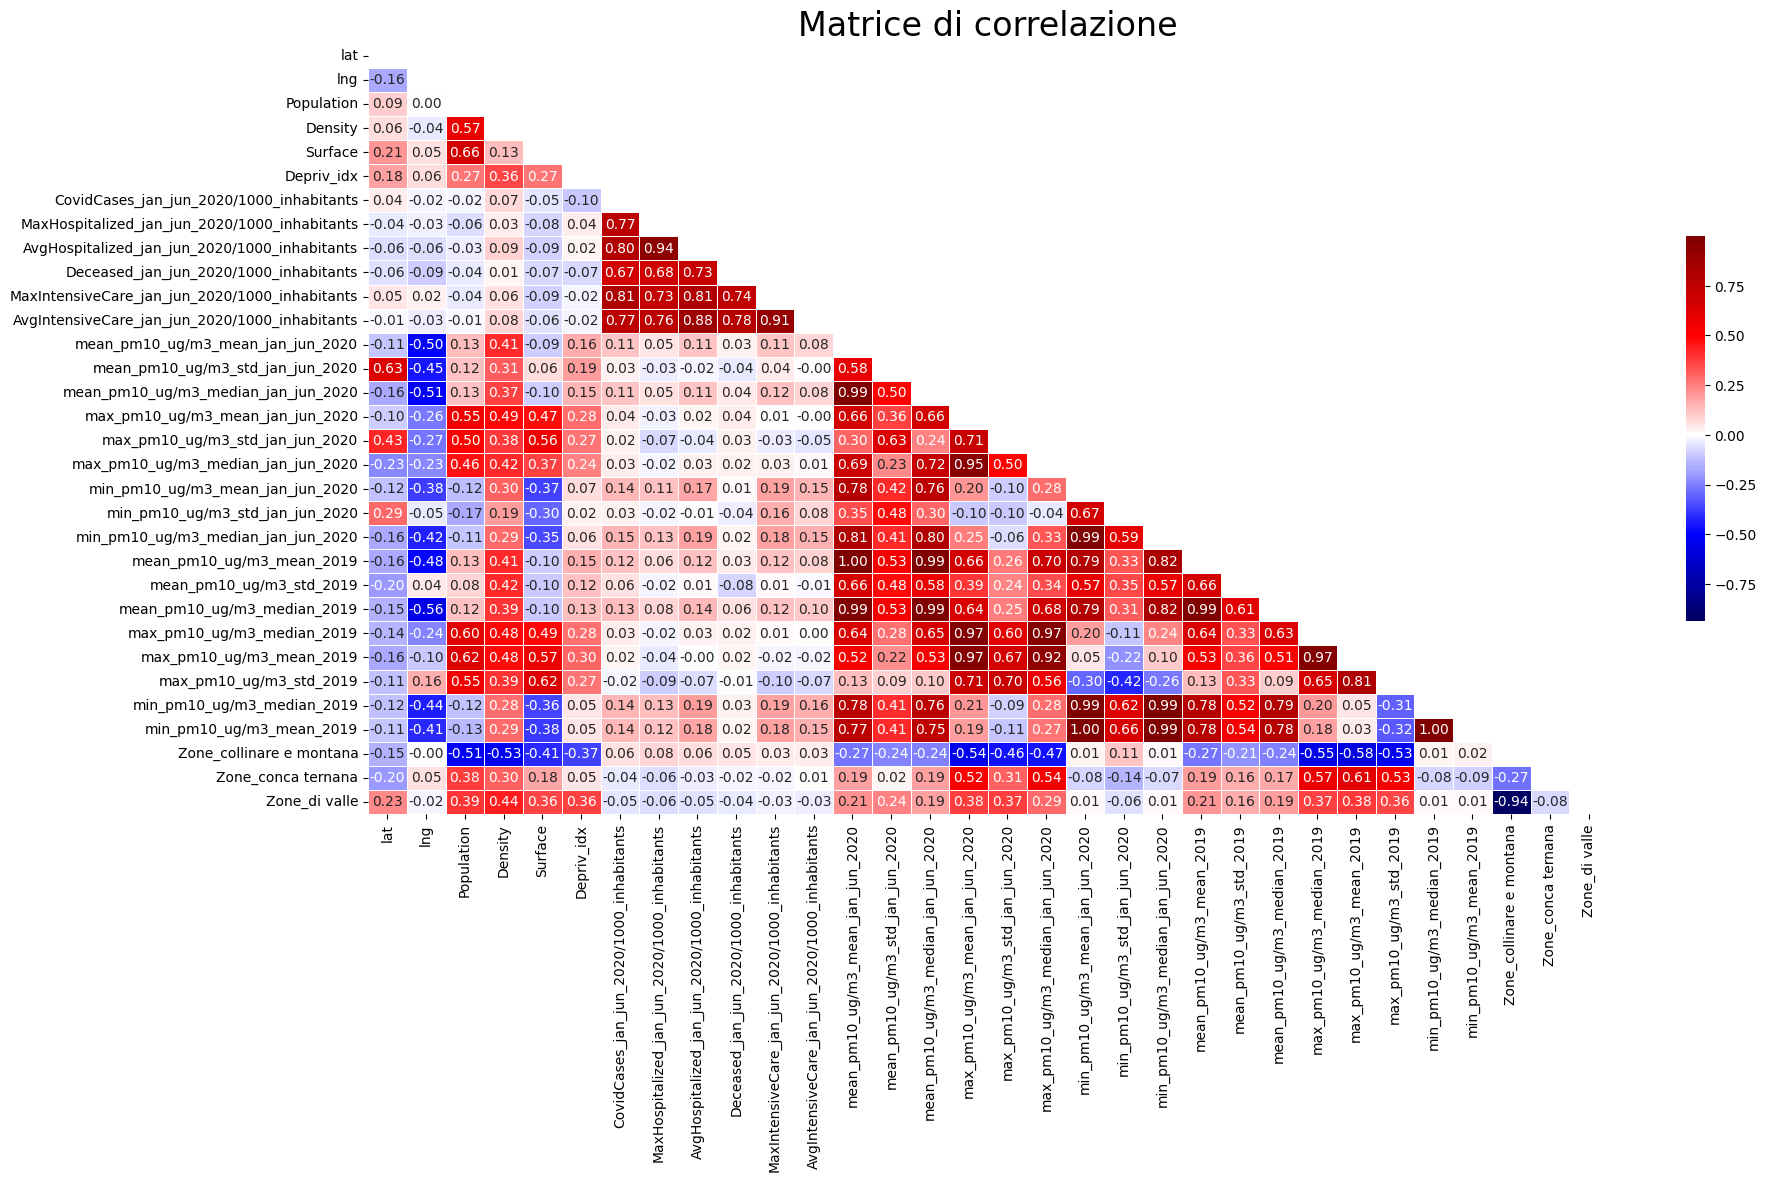

In [13]:
import seaborn as sns

df_corr = cov19.drop(columns='City')
# vengono assegnati valori numerici alla variabile qualitativa "Zone"
df_corr = pd.get_dummies(df_corr, columns=['Zone'], drop_first=False)

correlation_matrix = df_corr.corr()

# creo una maschera che copra il triangolo superiore
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(correlation_matrix, mask=mask, cmap="seismic", center=0, annot=True, fmt='.2f',
            square=False, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title('Matrice di correlazione', fontsize=24)


Si nota come le features epidemiologiche siano altamente correlate tra loro, così come le features riguardanti l'inquinamento dell'aria. Tuttavia, non sembra esserci correlazione tra epidemiologia e presenza di polveri sottili nell'aria, né nell'anno 2020 né nel 2019. 

### 5. Mappe

Vengono ora creati dei grafici su mappa.

Inizialmente viene analizzata la struttura del file geojson che contiene le informazioni necessarie per costruire la mappa. Si osserva che è una lista di dizionari. Vengono richiamati i nomi dei comuni per verificare che corrispondano esattamente a quelli presenti nel dataset: 

In [14]:
import json

f = open("limits_R_10_municipalities.geojson")
geojson = json.load(f)
print(list(geojson.keys()))
print(geojson['features'][0])

nomi_comuni = {feature['properties']['name'] for feature in geojson['features']}
print(nomi_comuni)

['type', 'bbox', 'features']
{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[12.695827612211199, 43.15368805794797], [12.695241977788982, 43.15195582196512], [12.694929493556733, 43.15113309914046], [12.692987319099267, 43.14651854240403], [12.69272165857017, 43.14606343581908], [12.692074725554164, 43.14560715165597], [12.691369796403283, 43.14538684361788], [12.689636798623464, 43.14502865316408], [12.68892984013423, 43.1448894165045], [12.690111779987678, 43.14153342927473], [12.691979310230282, 43.13896109786032], [12.69911393157416, 43.13170306844336], [12.70780607110218, 43.12443907451031], [12.708323603788822, 43.124422279978994], [12.709494593209188, 43.124654369819076], [12.711853446580319, 43.12538358238146], [12.712305207140389, 43.126107215523405], [12.712625515102843, 43.12674056171061], [12.712734015846577, 43.12746631208708], [12.712452097842283, 43.129078122003946], [12.712210435938285, 43.12995931522894], [12.71165068838953, 43.13011704714299], [1

Si osservano incongruenze, ad esempio gli spazi tra le parole nel dataset son rappresentati da trattini bassi, a differenza di ciò che accade nel file geojson. Pertanto si sceglie di sostituire tutti i dati nella colonna 'City' con la lista 'nomi comuni', che viene precedentemente ordinata in ordine alfabetico. 

In [15]:
nomi_comuni = list(nomi_comuni)
nomi_comuni.sort()

for nome, city in zip(nomi_comuni, cov19['City']):
    cov19['City']=cov19['City'].str.replace(city, nome)


#### 5.1 Mappa interattiva
viene creata una mappa in cui la terza feature, rappresentata dal colore, è selezionabile tra quelle del dataframe. Le tooltips mostrano le seguenti informazioni:
- Nome del comune
- Numero di abitanti
- Densità abitativa
- Superficie

Nel caso in cui la terza feature scelta non sia una di queste, viene mostrata anch'essa nella tooltip. 


In [16]:
all_features = cov19.columns.tolist()
options = all_features[3:] 

def function(third_feature):
    lat_center = cov19['lat'].median()
    lng_center = cov19['lng'].median()    # coordinate per il centro della mappa

    fig1 = px.choropleth_map(cov19, geojson=geojson, locations='City', color=third_feature,
                            color_continuous_scale="Plasma",
                            map_style="carto-positron",
                            zoom=7, center = {"lat": lat_center, "lon": lng_center},
                            opacity=0.8,
                            # hover_name='City',
                            hover_data=['Population', 'Surface', 'Density', third_feature],
                            # labels={'Comune':'City', 'Casi covid':'CovidCases_jan_jun_2020/1000_inhabitants'},
                            featureidkey = 'properties.name'
                            )
    
    fig1.update_layout(
        margin={"r":0,"l":0,"b":0},
        title={
            'text': 'Mappa del territorio',
            'x': 0.5,
            'font':{'size':24},
            'xanchor': 'center',
            'yanchor': 'middle'
            }
    )
    fig1.show()

interact(function, third_feature = widgets.Dropdown(options=options, description='Variabile:'))

interactive(children=(Dropdown(description='Variabile:', options=('Population', 'Density', 'Surface', 'Depriv_…

<function __main__.function(third_feature)>

## Modeling

### Unsupervised Learning

K-means è un noto algoritmo che permette di fare un'analisi di clustering in un insieme di dati omogenei. L'algoritmo è strutturato in questo modo:
- viene inizializzata la procedura: vengono scelti k punti (dove k è il numero di cluster in cui viene diviso il dataset), detti centroidi, in maniera casuale;
- ogni punto del dataset viene assegnato al centroide che si trova a distanza minore. In questo modo si formano k clusters;
- per ogni cluster viene calcolato il nuovo centroide, facendo la media di ogni feature su tutti i punti del cluster;
- con i nuovi centroidi, viene ripetuta l'assegnazione di ogni punto del dataset e il ciclo si ripete fino alla convergenza.

K-means si basa sulla minimizzazione della varianza totale intra-gruppo, o inerzia, definita nel seguente modo:

$$\sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

Un aspetto molto importante di questo tipo di analisi è trovare il numero ottimale di cluster in cui dividere il proprio dataset. Per farlo esistono diversi criteri. Un criterio qualitativo è il cosiddetto _elbow method_, che consiste nello scegliere il valore di k per cui l'andamento dell'inerzia in funzione di k si modifica in maniera evidente (segue, appunto, una sorta di andamento "a gomito"). 

Tra i metodi qualitativi, si ritiene che quello più adatto sia il criterio di Calinski-Harabasz, che definisce il numero k di cluster ottimale come quello per cui è maggiore la quantità:

$$CH(k) = \frac{tr(B_k)}{Tr(W_k)} \frac{N-k}{k-1}$$

dove $B_k$ è la matrice di dispersione tra i cluster, $W_k$ è quella inter-cluster, $N$ è il numero di punti nel dataset.

Il dataset in analisi contiene dati eterogenei, con valori e range differenti tra loro. Affinché ogni feature abbia lo stesso peso nell'implementazione di kmeans, i dati vengono riscalati: 
$$z_i = \frac{x_i-\mu_X}{\sigma_X}$$
dove $\mu_X$ è la media della feature $X$ e $\sigma_X$ è la sua deviazione standard.

Numero di cluster ottimali secondo Calinski-Harabasz:  3  con valore dell'indice  36.50


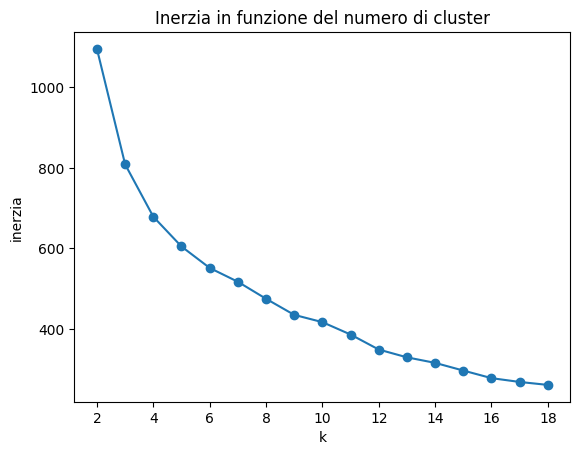

In [86]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score


kmeans_features = cov19.columns.tolist()[6:22]  # features con cui vengono calcolati i cluster
cov19_kmeans = cov19[kmeans_features]
k_vals = np.arange(2, 19)

std_scale = preprocessing.StandardScaler().fit(cov19_kmeans)
cov19_kmeans_scaled = std_scale.transform(cov19_kmeans)

def kmeans_function(scaled_df, k_values, CH=False):
    # scaling: le features usate per k-means avranno tutte media 0.0 e deviazione std 1.0
    
    inertia_values = []
    calinski_harabasz_index = []

    # creo una lista in cui inserire i cluster, poi verrà convertita a dataframe
    cluster_values = []
    cluster_index = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
        result = kmeans.fit_predict(scaled_df)
        cluster_values.append(result)
        cluster_index.append(f"{k}_clusters")
        inertia_values.append(kmeans.inertia_)
        calinski_harabasz_index.append(calinski_harabasz_score(scaled_df, result))
    if CH == True:
        ch_optimal_index = np.argmax(calinski_harabasz_index)+2
        print("Numero di cluster ottimali secondo Calinski-Harabasz: ", ch_optimal_index, \
            " con valore dell'indice ", f"{np.max(calinski_harabasz_index):.2f}")

    dataframe_cluster = pd.DataFrame(cluster_values)
    dataframe_cluster = dataframe_cluster.transpose()
    dataframe_cluster.columns = cluster_index

    fig, ax = plt.subplots()

    ax.plot(k_values, inertia_values, "o-")
    ax.set_title("Inerzia in funzione del numero di cluster")
    ax.set_xlabel("k")
    ax.set_ylabel("inerzia")
    plt.show()

    return dataframe_cluster

df_clusters = kmeans_function(cov19_kmeans_scaled, k_vals, CH=True)

Dal grafico si osserva che la curva decresce all'aumentare del numero di cluster. Questo è corretto, poiché l'inerzia dipende dalle distanze al quadrato dei punti nel cluster; pertanto un numero più alto di divisioni crea cluster più piccoli i cui punti sono quindi meno distanti. Tuttavia, scegliendo un numero troppo alto di cluster si rischia di creare una suddivisione difficile da interpretare e questo può essere controproducente. Perciò si sceglie per k ottimale un valore per cui l'abbassamento dell'inerzia a scapito dell'interpretabilità dei dati non è più vantaggioso.

Osservando la curva nel caso in esame, secondo il criterio appena descritto si identifica il numero ottimale di cluster tra 3 e 5, in accordo con il criterio di Calinski-Harabasz. 

#### Proiezione dei risultati su mappa

Viene creata una mappa in cui vengono vengono mostrati i cluster a cui appartengono i vari comuni. Il numero di cluster k può essere selezionato dall'utente. 

In [87]:
cov19_with_clusters = pd.concat([cov19, df_clusters], axis=1)
cluster_options = cov19_with_clusters.columns.tolist()[32:]   # lista delle opzioni selezionabili

def cluster_map(third_feature):
    lat_center = cov19_with_clusters['lat'].median()
    lng_center = cov19_with_clusters['lng'].median()    # coordinate per il centro della mappa

    fig1 = px.choropleth_map(cov19_with_clusters, geojson=geojson, locations='City', color=third_feature,
                            color_continuous_scale="Plasma",
                            map_style="carto-positron",
                            zoom=7, center = {"lat": lat_center, "lon": lng_center},
                            opacity=0.8,
                            hover_data=['Zone'],
                            featureidkey = 'properties.name'
                            )
    
    fig1.update_layout(
        margin={"r":0,"l":0,"b":0},
        title={
            'text': 'Mappa del territorio',
            'x': 0.5,
            'font':{'size':24},
            'xanchor': 'center',
            'yanchor': 'middle'
            }
    )
    fig1.show()

interact(cluster_map, third_feature = widgets.Dropdown(options=cluster_options, description='Num. di cluster:'))

interactive(children=(Dropdown(description='Num. di cluster:', options=('2_clusters', '3_clusters', '4_cluster…

<function __main__.cluster_map(third_feature)>

### 7. Clustering con PCA

La principal component analysis (PCA) è un metodo di processazione dei dati che consente di ridurre la dimensionalità del problema minimizzando la perdita di informazione. Consiste nel ricavare delle nuove variabili $w_i$ che siano combinazione lineari delle features di partenza $x_i$. 

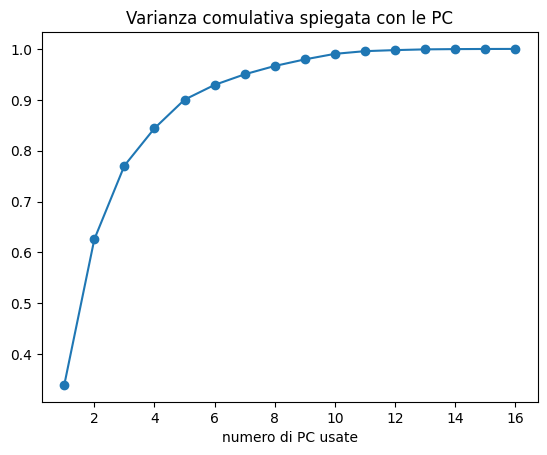

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
score_matrix = pca.fit_transform(cov19_kmeans_scaled)

ratios = pca.explained_variance_ratio_
x = np.arange(1, pca.n_components_+1)
plt.plot(x, np.cumsum(ratios), '-o')
plt.title("Varianza comulativa spiegata con le PC")
plt.xlabel("numero di PC usate")
plt.show()

Per determinare il numero ottimale di componenti principali da usare per descrivere il dataset, si può usare ancora una volta l'elbow method. Osservando il grafico si deduce che 3 componenti sono già sufficienti a spiegare qusi l'80% della varianza dei dati. Pertanto si sceglie di procedere con clustering dei dati, usando le prime tre componenti principali. 

Viene ripetuta la PCA, questa volta solo con 3 variabili come risultato:

In [ ]:
pca3 = PCA(n_components=3)
score_matrix3 = pca3.fit_transform(cov19_kmeans_scaled)
data_pca3 = pd.DataFrame(score_matrix3) # per poter concatenare queste nuove features al df esistente
data_pca3.columns = ("PC1", "PC2", "PC3")   # vengono rinominate le colonne per praticità

tot_var_explained = np.sum(pca3.explained_variance_ratio_)*100
print(f"Varianza totale spiegata con 3 PC: {tot_var_explained:.2f}%")

Varianza totale spiegata con 3 PC: 77.05%


Per capire in che modo le nuove variabili siano legate alle vecchie, si costruisce la matrice che indica per ogni variabile latente il contributo delle feature di partenza: 

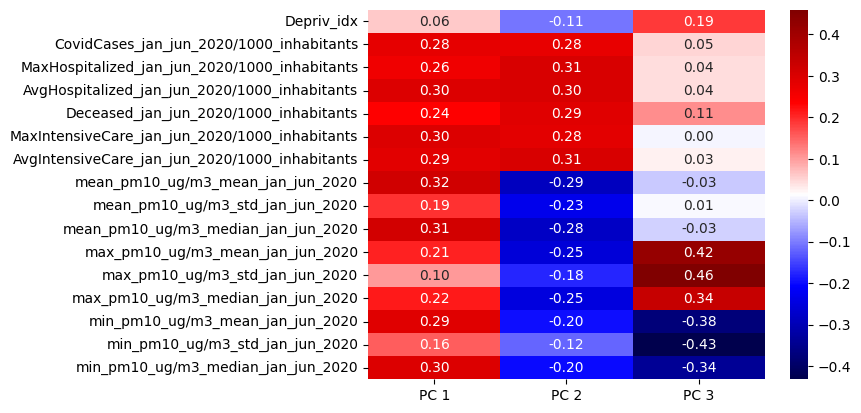

In [ ]:
hm = sns.heatmap(pca3.components_.transpose(), cmap="seismic", fmt=".2f", annot=True, yticklabels=kmeans_features, \
                xticklabels=("PC 1", "PC 2", "PC 3"))

A questo punto si può procedere con il clustering con PCA. 

Le componenti principali vengono rinormalizzate per applicare kmeans:

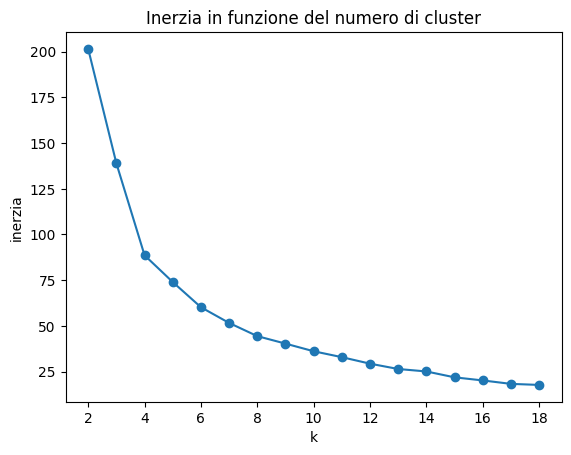

In [88]:
std_scale = preprocessing.StandardScaler().fit(data_pca3)
data_pca3_scaled = std_scale.transform(data_pca3)

df_clusters_pca3 = kmeans_function(data_pca3_scaled, k_vals)


In questo caso, dal grafico dell'inerzia sembra che il numero ottimale di cluster sia 4. 

Si costruisce un plot 3d con le PCA, in modo da visualizzare il clustering:

In [ ]:
# le opzioni sono le feature prodotte da kmeans
pca3_options = df_clusters_pca3.columns.tolist()

# dataframe che contenga sia i valori delle PC, sia i cluster fatti con PCA
cov19_pca3 = pd.concat((cov19, data_pca3, df_clusters_pca3), axis=1)

def plot_3d(color_feature):
    fig = px.scatter_3d(cov19_pca3, x='PC1', y='PC2', z='PC3',
                color=color_feature,
                hover_name='City')
    
    fig.update_layout(
        width=800, height=600,
        title={
            'text': 'Clustering con PCA',
            'x': 0.5,
            'font':{'size':24},
            'xanchor': 'center',
            'yanchor': 'middle'
            }
    )
    fig.show()

interact(plot_3d, color_feature = widgets.Dropdown(options=pca3_options, description='Num. di cluster:', value = '3_clusters'))

interactive(children=(Dropdown(description='Num. di cluster:', index=1, options=('2_clusters', '3_clusters', '…

<function __main__.plot_3d(color_feature)>

Si osserva lo stesso fenomeno che si osservava senza PCA, cioè che i comuni di Giove e Porano si trovano sempre in un cluster a parte.

### Supervised Learning

Per prima cosa vengono selezionate le feature interessate dalla regressione:

In [75]:
regression_features = ['lat', 'lng', 'Surface', 'mean_pm10_ug/m3_mean_jan_jun_2020', 'mean_pm10_ug/m3_std_jan_jun_2020',\
                    'mean_pm10_ug/m3_median_jan_jun_2020', 'CovidCases_jan_jun_2020/1000_inhabitants']
cov19_regression = cov19[regression_features]

x = cov19_regression[['lat', 'lng', 'Surface', 'mean_pm10_ug/m3_mean_jan_jun_2020', \
                                'mean_pm10_ug/m3_std_jan_jun_2020', 'mean_pm10_ug/m3_median_jan_jun_2020']]
y = cov19_regression['CovidCases_jan_jun_2020/1000_inhabitants']

#### Regressione lineare

Come primo metodo di regressione si sceglie la regressione lineare. Questa infatti è concettualmente semplice e di interpretabilità immediata. 

Per verificare la bontà del modello verranno utilizzati il _root mean squared error_(RMSE) e $R^2$.

Poiché il set di dati è piccolo, per sfruttare al meglio tutto il dataset durante il training ed evitare che l'addestramento dipenda dalla scelta di un particolare set di dati, si procede con la cross-validation.   

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=0)
# Cross-validation con 5 fold
rmse_scores = cross_val_score(model, x, y, cv = kf, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(model, x, y, cv=kf, scoring='r2')

print("RMSE per ciascun fold:", -rmse_scores)
print("RMSE medio:", -rmse_scores.mean())
print("Deviazione standard RMSE:", rmse_scores.std())
print("R-quadro per ciascun fold:", r2_scores)
print("R-quadro medio:", r2_scores.mean())
print("Deviazione standard R-quadro:", r2_scores.std())


RMSE per ciascun fold: [2.65256448 1.86814308 6.51897575 2.08296026 3.90418803]
RMSE medio: 3.405366319993589
Deviazione standard RMSE: 1.7100824790343645
R-quadro per ciascun fold: [-0.31261481 -0.76724201 -0.27864745 -7.31634452 -0.31011165]
R-quadro medio: -1.7969920885027868
Deviazione standard R-quadro: 2.7656173361845315


Il valore di $R^2$ va da $-\inf$ a 1; tanto più il suo valore è vicino ad 1, tanto più il modello è buono. In questo caso il valore è negativo, che significa che il modello trovato non si adatta bene ai dati. 

Riguardo il RMSE, questo è significativamente alto e indica che il modello commette un errore significativo nella predizione dei dati. 

Da queste premesse, si ritiene utile calcolare il p-value delle variabili coinvolte. Per farlo, si ripete la cross-validation, ma per ogni training set si calcolano i p-values. Poi si prende come p-value per ogni varialbile la media dei 5 p-values. 

In [77]:
import statsmodels.api as sm

kf = KFold(n_splits=5, shuffle=True, random_state=0) # riproducibilità

# lista per raccogliere i p-value per ciascun fold
all_pvalues = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # viene aggiunta una colonna per l'intercetta
    x_train_const = sm.add_constant(x_train)

    model = sm.OLS(y_train, x_train_const)
    results = model.fit()

    pvalues = results.pvalues
    all_pvalues.append(pvalues)

pvalues_df = pd.DataFrame(all_pvalues)

mean_pvalues = pvalues_df.mean()
std_pvalues = pvalues_df.std()

print("P-values medi per ogni variabile:")
print(mean_pvalues)

print("\nDeviazione standard dei p-values:")
print(std_pvalues)


P-values medi per ogni variabile:
const                                  0.160710
lat                                    0.205684
lng                                    0.501815
Surface                                0.617695
mean_pm10_ug/m3_mean_jan_jun_2020      0.170129
mean_pm10_ug/m3_std_jan_jun_2020       0.128466
mean_pm10_ug/m3_median_jan_jun_2020    0.230183
dtype: float64

Deviazione standard dei p-values:
const                                  0.306640
lat                                    0.399419
lng                                    0.347248
Surface                                0.202089
mean_pm10_ug/m3_mean_jan_jun_2020      0.113686
mean_pm10_ug/m3_std_jan_jun_2020       0.187642
mean_pm10_ug/m3_median_jan_jun_2020    0.043905
dtype: float64


I valori di $p$ sono in generale abbastanza alti. Se si prende come soglia $p>0.05$, allora bisogna prendere in considerazione la possibilità che i predictors in esame non siano utili alla stima dei casi covid. Si conclude quindi che la regressione lineare non è un modello valido per stimare $y$ a partire dai predictors forniti.

### Random forest

Il modello lineare non sembra essere adatto per il dataset in esame. Pertanto ci si orienta verso un metodo di regressione diverso, ossia la random forest. Rispetto al singolo albero decisionale, il vantaggio di una random forest è la riduzione del rischio di overfitting o di errore legato a uno specifico training set, e una maggiore accuratezza. 

Poiché non si sa a priori quali siano i parametri migliori per l'algoritmo, questi vengono cercati con il metodo di ricerca a griglia.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

rf_model = RandomForestRegressor(random_state=0)

# Specifica la griglia di parametri da esplorare
param_grid = {
    'n_estimators': np.arange(10, 100, 10),  # Numero di alberi
    'max_depth': np.arange(1, 15),  # Profondità massima dell'albero
    'min_samples_split': np.arange(2, 10),  # Minimo numero di campioni per dividere un nodo
    'min_samples_leaf': np.arange(1, 5),  # Minimo numero di campioni per foglia
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Migliori parametri:", grid_search.best_params_)

# Ottieni il miglior modello con i parametri ottimali
best_rf_model = grid_search.best_estimator_

Migliori parametri: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}


NameError: name 'X_test' is not defined

Ottenuto il modello ottimale, se ne può verificare la bontà:

In [80]:
y_pred = best_rf_model.predict(x_test)

rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_best_rf = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse_best_rf}")
print(f"r-squared: {r2_best_rf}")

Root Mean Squared Error: 3.787918384983597
r-squared: -1.6767426850369729


I risultati sono molto simili a quelli ottenuti per la regressione lineare, quindi si deduce che neanche questo modello è adatto a trovare un'eventuale correlazione tra i predictors e la variabile $y$.

### Importanza dei predictors

Uno dei vantaggi delle random forest è che si può facilmente ottenere l'importanza delle variabili, cioè quanto queste contribuiscono al risultato finale. 

<function matplotlib.pyplot.show(close=None, block=None)>

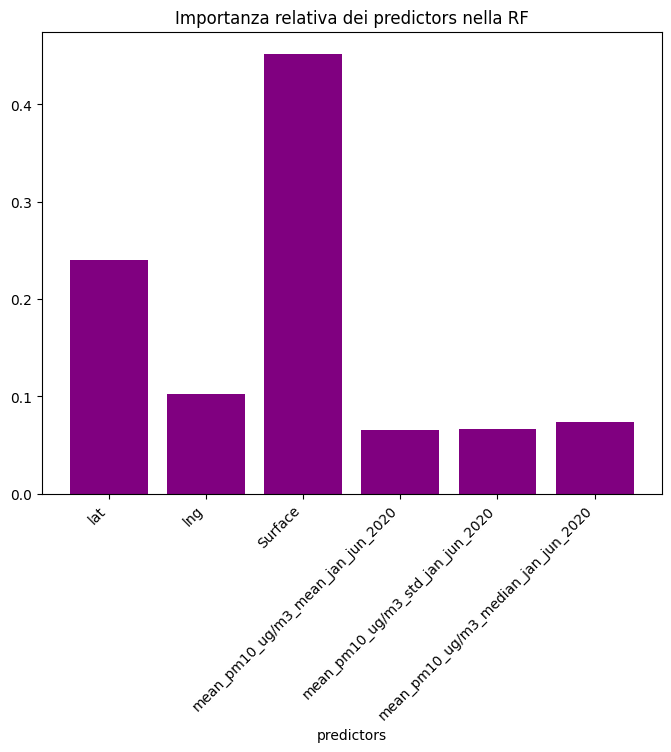

In [ ]:
importances = best_rf_model.feature_importances_
predictors = x.columns.tolist()
plt.figure(figsize=(8, 6))
plt.bar(predictors, importances, color='purple')
plt.title("Importanza relativa dei predictors nella RF")
plt.xticks(rotation=45, ha="right")
plt.show

Dal grafico si evince come, secondo il modello adottato, non ci sia correlazione tra l'inquinamento dell'aria e l'epidemiologia del territorio.